<a href="https://colab.research.google.com/github/purduelamm/purdue_me597_iiot/blob/main/lab/lab3/L3_Colab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3.3 IO-Link data collection using JSON interface

## 3.1 Python programming for data collection from IO-Link master

The entire schematic of the data communication using JSON interface using REST API for the IO-Link vibraton device from the IO-Link master is illustrated in Figure 15. As the power meter data collection, your computers (laptop and Raspberry Pi) are on the router network. The IO-Link master is also on the same router network with a static IP address. The ethernet cable (RJ45) is used for connection between the router and the IO-Link master. Note that the IO-Link vibration sensor is connected to the **port 1** of the master. In this case using REST API, each of your computer is not a master but client. The IO-Link master is a server. The data communication sequence to read data from the IO-Link master is summarized as follows.

1.  The computer (Raspberry Pi or laptop) requests data using REST API's post method to the IO-Link master
2.  The IO-Link master read the IO-Link sensor data by the IO-Link protocol
3.  The IO-Link master sends back the received data from the IO-Link sensor to the computer as the JSON format.
4.  The computer receives the JSON data and parse it.

To do this, we will use Python and 'requests' and 'json' packages which are the basic packages in Python. Moreover, refer to details of JSON interface of the IFM IO-Link master [here](https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/lab3/IFM_JSON_Integration_for_IO-Link.pdf?raw=true). The IO-Link vibration sensor (VVB001) manual for interface is also available [here](https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/lab3/IFM_VVB001_IO-Link_Interface_Description.pdf?raw=true). **Please note that this lab manual skips all details to extract data for your convenience. If you perform data collection from other IoT devices, the first thing you have to do is to read the manual and figure out data communication protocols and take appropriate action.**


<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/lab3_fig15.png?raw=true" width="90%">


*Figure 15 Schematic of communication for IO-Link data collection using JSON interface*

 **The IP address of the gateway at Lab3**.
 <br/>
 Offline class : 192.168.1.102
  <br/>
<font color=”green”> Online class </font> : 10.165.67.146


### Task 3.1

Capture the results of checking network connection using ping test from both Raspberry Pi and laptop to the IO-Link master for REST API as Figure 13 ([Lab3.2](https://githubtocolab.com/purduelamm/purdue_me597_iiot/blob/main/lab/lab3/L3_Colab2.ipynb)) and attach it to the report.
*  Please note that the IP address of the IO-Link master will be different from the example.




---

Place your screenshot for Task 3.1 here from Raspberry Pi
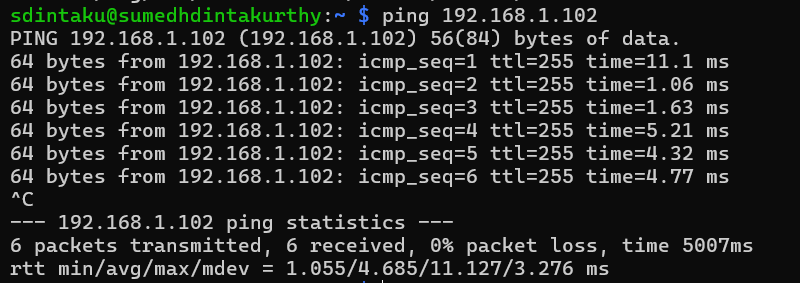
---





---

Place your screenshot for Task 3.1 here from laptop
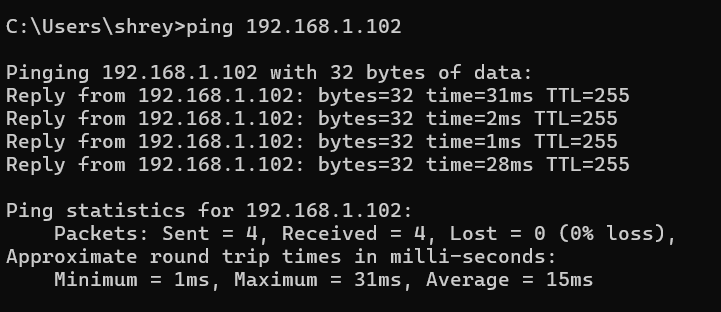
---



If ping test works, you are ready to request data. Before we request data to the IO-Link master, let's see what data is available from the sensor. The selected available data is shown in Table 4. These information is also available on the manual [here](https://github.com/Eunseob/purdue_me597/blob/main/lab/lab3/IFM_VVB001_IO-Link_Interface_Description.pdf?raw=true) on page 9. Other than data from Table 4, tens of more data are available. In this lab, we will collect the selected data only. The refresh rate of the sensor is approximately 200 msec in default setting.

**Note that to take an appropriate value with unit, a multiplier in the Range column of Table 4 must be applied after receiving data. For example, after multiplying 0.0001 to v-Rms value, the measured data has unit of m/s.**

*Table 4 Selected process data from VVB001 sensor*

<table width="100%">
<thead>
  <tr>
    <th>Process data input</th>
    <th>Description</th>
    <th>Record Type</th>
    <th>Range</th>
    <th>Unit</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>v-Rms</td>
    <td>Speed effective value</td>
    <td rowspan="5">IntegerT (16 bit)</td>
    <td>(0 to 495)*0.0001</td>
    <td>m/s</td>
  </tr>
  <tr>
    <td>a-Peak</td>
    <td>Acceleration peak value</td>
    <td>(0 to 4903)*0.1</td>
    <td>m/s2</td>
  </tr>
  <tr>
    <td>a_Rms</td>
    <td>Acceleration effective value</td>
    <td>(0 to 4903)*0.1</td>
    <td>m/s2</td>
  </tr>
  <tr>
    <td>Temperature</td>
    <td>Current temperature</td>
    <td>(-300 to 800)*0.1</td>
    <td>°C</td>
  </tr>
  <tr>
    <td>Crest</td>
    <td>Acceleration crest factor</td>
    <td>(10 to 500)*0.1</td>
    <td>-</td>
  </tr>
</tbody>
</table>

---

**<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/icon_Python.png?raw=tru" width="20">Python - Python 3 ([lab3_sample2.py](https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/lab3/lab3_sample2.py?raw=true))**

```
import requests
import json
import datetime

# define the IO-Link master IP
URL = "http://192.168.1.102/" # For online student with Cisco VPN : 10.165.67.146

# define JSON body for post method
# for the details, see the JSON interface manual
# note that the sensor is connected to port 1
BODY = {
        "code":"request",
        "cid":-1,
        "adr":"/iolinkmaster/port[1]/iolinkdevice/iolreadacyclic",
        "data":{"index":40,"subindex":0}    
}

now = datetime.datetime.now()

# this requests data to the IO-Link master
# using POST method of REST API with BODY information
# req object will be response from the IO-Link master
req = requests.post(url = URL, json=BODY)

data_json = req.json() # this is json format data of req

# because the the JSON data itself is in unformatted,
# dumps method of JSON module below helps us to see the data in JSON format
data_json_formatted = json.dumps(data_json, indent=2)

print(now, ': Data structure from the IO-Link master\n',data_json_formatted)

# parsing JSON:
# as you can see the above print,
# 'value' is accesible in 'data' of the JSON data
value = data_json['data']['value']

# the raw measured value looks like 0000FC000002FF000000FF0000F6FF000026FF03
# the length of the value is 40
# this is byte array in 16-bit integer format
print('raw measured value is', value)


# Always, the returned value type from JSON is string
# below is converting the value to v-Rms
# description of v_rms variable is that
# first, select first four elements from value
# second, convert them into 16-bit integer
# third, multiply 0.0001 to take the correct unit (m/s) and data
# finally, rounding up and the data type is float
v_rms = round(int(value[0:4], 16) * 0.0001)

print('v_Rms =', v_rms ,'m/s')

### indexing information is that
# a_Peak data = value[8:12]
# a_Rms data = value[16:20]
# Temperature data = value[24:28]
# Crest data = value[32:36]

```

---

The sample code 2 (lab3_sample2.py) is given as above. This code is to print out v_Rms. Go through the code and run it. Based on the given code, perform the Tasks below.

### Task 3.2

Modify the sample code 2 on both laptop and Raspberry Pi to print out all data (v_Rms, a_Peak, a_Rms, Temperature, and Crest) as Table 4.

* Print the values with units in Table 4




---

Place your screenshot for Task 3.2 here from Raspberry Pi
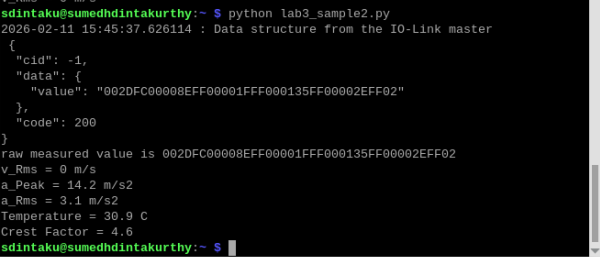
---



### Task 3.3

1.	Perform the same as Task 2.3; Modify sample code 2 to collect IO-Link data for at least 1 minute and save data as a CSV file.

* You can use one computer either laptop or Raspberry Pi.
* Set the sampling period 1 second.
* Data (header) should include time or datetime, v_Rms, a_Peak, a_Rms, Temperature, Crest as Table 5.
* As a practice, plot data and calculate time-domain features.

*Table 5 Example data of output CSV file for Task 3.3*
<table width="100%">
<thead>
  <tr>
    <th>Time [sec]</th>
    <th>v_Rms [m/s]</th>
    <th>a_Peak [m/s2]</th>
    <th>a_Rms [m/s2]</th>
    <th>Temperature [C]</th>
    <th>Crest [-]</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td colspan="6" align="center">...</td>
  </tr>
  <tr>
    <td>10.254</td>
    <td>0.001</td>
    <td>1.24</td>
    <td>0.48</td>
    <td>24.1</td>
    <td>2.58</td>
  </tr>
  <tr>
    <td>10.461</td>
    <td>0.002</td>
    <td>1.34</td>
    <td>0.51</td>
    <td>23.9</td>
    <td>2.63</td>
  </tr>
  <tr>
    <td colspan="6" align="center">...</td>
  </tr>
</tbody>
</table>

In [1]:
### Place your entire code for Task 3.3 Here
# If you want, you can add more code block below to load csv file and plot it.
import requests
import json
import datetime
import time
import csv
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------
# IO-Link Master IP
# --------------------------------
URL = "http://192.168.1.102/"

BODY = {
    "code": "request",
    "cid": -1,
    "adr": "/iolinkmaster/port[1]/iolinkdevice/iolreadacyclic",
    "data": {"index": 40, "subindex": 0}
}

# --------------------------------
# CSV Setup
# --------------------------------
filename = "iolink_data.csv"

with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([
        "Datetime",
        "v_Rms (m/s)",
        "a_Peak (m/s^2)",
        "a_Rms (m/s^2)",
        "Temperature (°C)",
        "Crest"
    ])

    # --------------------------------
    # Data Collection Loop (1 minute)
    # --------------------------------
    duration = 60          # seconds
    sampling_period = 1    # second
    start_time = time.time()

    # Lists for plotting + features
    v_rms_list = []
    a_peak_list = []
    a_rms_list = []
    temp_list = []
    crest_list = []

    while (time.time() - start_time) < duration:

        now = datetime.datetime.now()

        req = requests.post(url=URL, json=BODY)
        data_json = req.json()

        value = data_json['data']['value']

        # -----------------------------
        # Convert Raw Hex to Engineering Units
        # -----------------------------

        # v_Rms
        v_rms = round(int(value[0:4], 16) * 0.001, 3)

        # a_Peak
        a_peak = round(int(value[8:12], 16) * 0.1, 2)

        # a_Rms
        a_rms = round(int(value[16:20], 16) * 0.1, 2)

        # Temperature (signed 16-bit)
        temp_raw = int(value[24:28], 16)
        if temp_raw >= 0x8000:
            temp_raw -= 0x10000
        temperature = round(temp_raw * 0.1, 1)

        # Crest
        crest = round(int(value[32:36], 16) * 0.1, 2)

        # Save in lists
        v_rms_list.append(v_rms)
        a_peak_list.append(a_peak)
        a_rms_list.append(a_rms)
        temp_list.append(temperature)
        crest_list.append(crest)

        # Write to CSV
        writer.writerow([
            now,
            v_rms,
            a_peak,
            a_rms,
            temperature,
            crest
        ])

        print(f"{now} | v_Rms={v_rms} m/s | a_Peak={a_peak} m/s² | "
              f"a_Rms={a_rms} m/s² | Temp={temperature} °C | Crest={crest}")

        time.sleep(sampling_period)

print("Data collection finished. CSV saved.")

# --------------------------------
# Time-Domain Feature Calculation
# --------------------------------

def time_features(signal):
    signal = np.array(signal)
    return {
        "Mean": np.mean(signal),
        "RMS": np.sqrt(np.mean(signal**2)),
        "Std Dev": np.std(signal),
        "Max": np.max(signal),
        "Min": np.min(signal)
    }

print("\n--- Time Domain Features ---")
print("v_Rms:", time_features(v_rms_list))
print("a_Peak:", time_features(a_peak_list))
print("a_Rms:", time_features(a_rms_list))
print("Temperature:", time_features(temp_list))
print("Crest:", time_features(crest_list))

# --------------------------------
# Plot Data
# --------------------------------

plt.figure(figsize=(10,6))
plt.plot(v_rms_list, label="v_Rms (m/s)")
plt.plot(a_rms_list, label="a_Rms (m/s^2)")
plt.plot(temp_list, label="Temperature (°C)")
plt.legend()
plt.xlabel("Sample Number")
plt.ylabel("Magnitude")
plt.title("IO-Link Sensor Data (1 minute)")
plt.grid()
plt.show()



KeyboardInterrupt: 

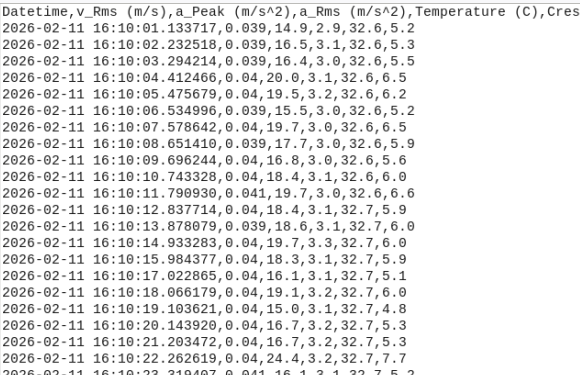

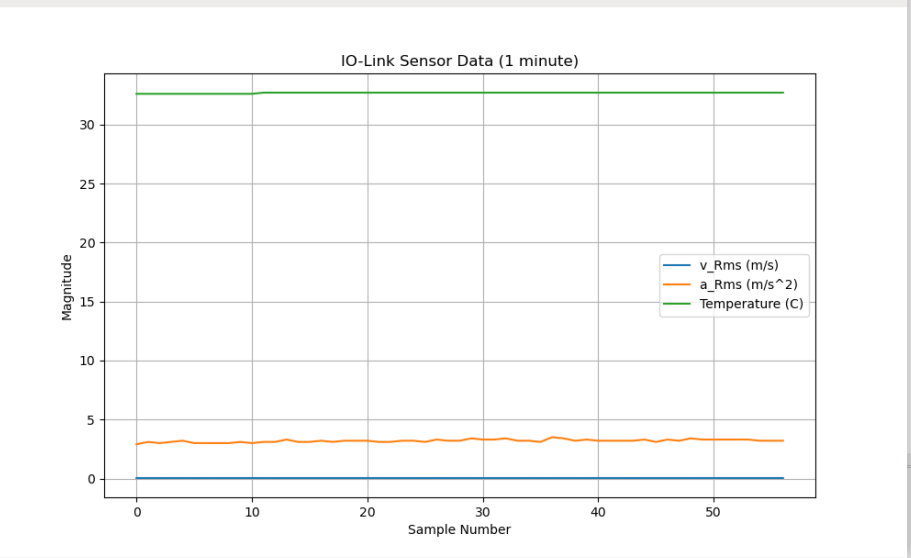

## 3.2 Data collection from multiple sensors in a single program

In this lab so far, we collected data from each sensor in a program. In this section, we try to collect data from both sensors at the same time in a single program.

Perform the Tasks below.

### Task 3.4

By using the sample code 1 and 2, program a Python code as instructed below.

* Make infinitely printing out all sensor data at the same time in a 'while' loop.
* Use 'try' and 'except' to halt your program when pressing Ctrl+c.
* Capture your console window or terminal when your program is running and attach it below.
* You can use either laptop or Raspberry Pi to run this code.




---

Place your screenshot for Task 3.4 here.
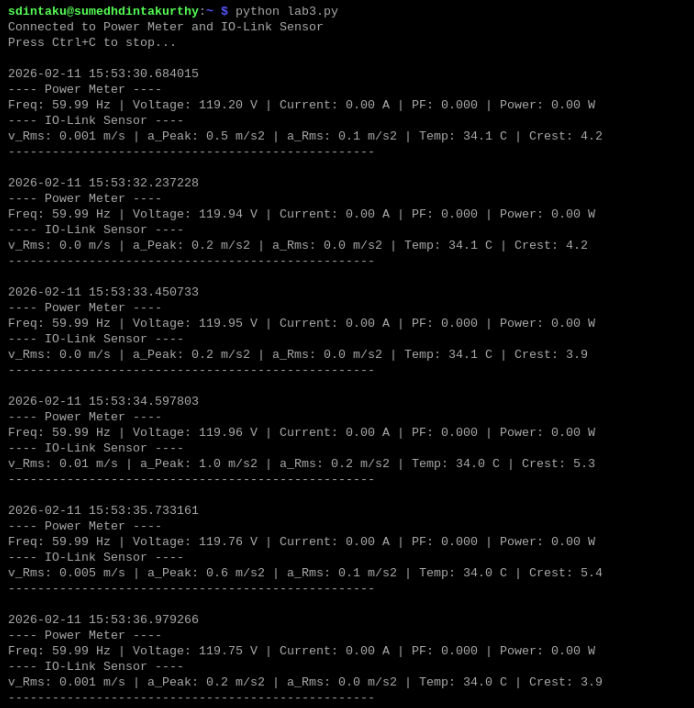
---



In [ ]:
### place your code for Task 3.4
from pymodbus.client.sync import ModbusTcpClient
from pymodbus.constants import Endian
from pymodbus.payload import BinaryPayloadDecoder
import requests
import datetime
import time

# -----------------------------------------
# SETTINGS
# -----------------------------------------

# Modbus Power Meter
MODBUS_HOST = "192.168.1.100"
MODBUS_PORT = 502
UNIT_ID = 1

# IO-Link Master
IOLINK_URL = "http://192.168.1.102/"
BODY = {
    "code": "request",
    "cid": -1,
    "adr": "/iolinkmaster/port[1]/iolinkdevice/iolreadacyclic",
    "data": {"index": 40, "subindex": 0}
}

# -----------------------------------------
# Function: Convert Modbus Registers to Float
# -----------------------------------------
def registers_to_float(registers):
    decoder = BinaryPayloadDecoder.fromRegisters(
        registers,
        byteorder=Endian.Big,
        wordorder=Endian.Big
    )
    return decoder.decode_32bit_float()

# -----------------------------------------
# Connect to Modbus
# -----------------------------------------
client = ModbusTcpClient(MODBUS_HOST, port=MODBUS_PORT)

if not client.connect():
    raise RuntimeError("Modbus connection failed")

print("Connected to Power Meter and IO-Link Sensor")
print("Press Ctrl+C to stop...\n")

# -----------------------------------------
# INFINITE LOOP
# -----------------------------------------
try:
    while True:

        now = datetime.datetime.now()

        # ------------------------
        # MODBUS POWER METER DATA
        # ------------------------
        freq_read = client.read_holding_registers(1536, count=2, unit=UNIT_ID)
        voltage_read = client.read_holding_registers(1538, count=2, unit=UNIT_ID)
        current_read = client.read_holding_registers(1540, count=2, unit=UNIT_ID)
        pf_read = client.read_holding_registers(1542, count=2, unit=UNIT_ID)
        power_read = client.read_holding_registers(1544, count=2, unit=UNIT_ID)

        if not freq_read.isError():
            freq = registers_to_float(freq_read.registers)
            voltage = registers_to_float(voltage_read.registers)
            current = registers_to_float(current_read.registers)
            pf = registers_to_float(pf_read.registers)
            power = registers_to_float(power_read.registers)
        else:
            freq = voltage = current = pf = power = 0

        # ------------------------
        # IO-LINK SENSOR DATA
        # ------------------------
        req = requests.post(url=IOLINK_URL, json=BODY)
        data_json = req.json()
        value = data_json['data']['value']

        # Convert Hex → Engineering Units
        v_rms = round(int(value[0:4], 16) * 0.001, 3)
        a_peak = round(int(value[8:12], 16) * 0.1, 2)
        a_rms = round(int(value[16:20], 16) * 0.1, 2)

        temp_raw = int(value[24:28], 16)
        if temp_raw >= 0x8000:
            temp_raw -= 0x10000
        temperature = round(temp_raw * 0.1, 1)

        crest = round(int(value[32:36], 16) * 0.1, 2)

        # ------------------------
        # PRINT EVERYTHING TOGETHER
        # ------------------------
        print(f"{now}")
        print("---- Power Meter ----")
        print(f"Freq: {freq:.2f} Hz | Voltage: {voltage:.2f} V | "
              f"Current: {current:.2f} A | PF: {pf:.3f} | Power: {power:.2f} W")

        print("---- IO-Link Sensor ----")
        print(f"v_Rms: {v_rms} m/s | a_Peak: {a_peak} m/s² | "
              f"a_Rms: {a_rms} m/s² | Temp: {temperature} °C | Crest: {crest}")

        print("--------------------------------------------------\n")

        time.sleep(1)   # 1 second sampling


# -----------------------------------------
# STOP PROGRAM SAFELY
# -----------------------------------------
except KeyboardInterrupt:
    print("\nProgram stopped by user (Ctrl+C).")
    print("Closing connections...")

finally:
    client.close()
    print("Connections closed safely.")



### Task 3.5

Let's think more about IoT sensors and data collection in the sense of the programmer. The answers are open-ended. Answer the questions below.

#### 1) If you want to collect data from muliple sensors which have different sampling periods, how can you implement your program?



---

Write down your answer to 1) here.
To handle this case, we can make sure that each sensor runs in its own thread with its own sampling period.
---



#### 2) How can you make your program robust/stable even if suddenly unwanted network connection failure happens?





---

Write down your answer to 2) here.
we can use the timeout function so that the network calls are all wrapped
---



#### 3) What can you do with the electrical power and vibration data? Can they be used for an operational condition or health monitoring?



---

Write down your answer to 3) here.
Detect load changes, Detect unbalances supply, detect mechanical faults like bearings, imbalance, misalignments
---



## Lab3 Summary and Deliverables

Answer the following questions for your achievements




### Q1. Please summarize Lab3.

---

Write down A1 here.
This is the true introduction to IoT. In this lab, we managed to connect to a vaccum pump and get the data of how much current its using and how much its vibrating using the modbus protocol. we then ended up capturing the data from multiple sensors in a single program
---


### Q2. What skills did you have to develop to accomplish this project?

---

Write down A2 here.
Learnt a lot about Modbus and IO-link master
---

### Q3. What aspects of this project were the most beneficial for your learning?

---

Write down A3 here.
Modbus and IO Linkmaster
---

### Q4. What challenges did you encounter in completing the project?

---

Write down A4 here.
NA
---

### Q5. How did you overcome the challenges or remedy the problems encountered?

---

Write down A5 here.
NA
---

<br></br>

Get back to [Lab Index Page](https://colab.research.google.com/github/purduelamm/purdue_me597_iiot/blob/main/index.ipynb)